## Exploring the Eye Tracking Data from the POET data set (for one image)

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

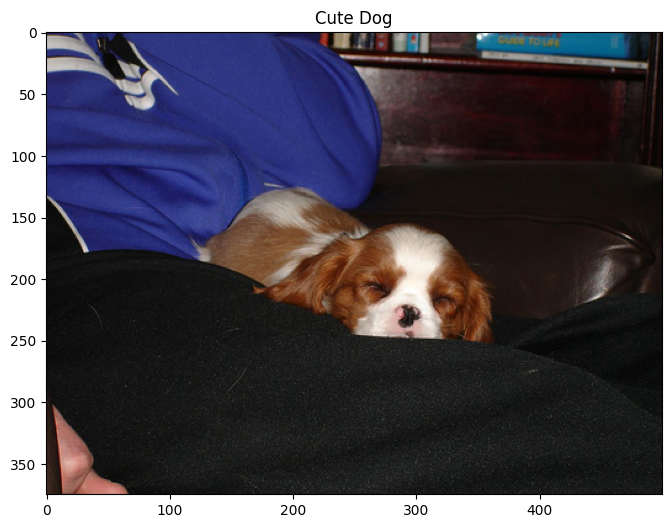

dict_keys(['__header__', '__version__', '__globals__', 'etData'])


In [2]:
# Load code for visualization --> Kaggle does not support matlab.engine

# Load image
image_path = '/kaggle/input/images/dog_2008_001921.jpg'

img = mpimg.imread(image_path)

# Plot the image
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(img)
plt.title('Cute Dog') 
plt.show()

# Load the .mat file
mat_data = scipy.io.loadmat('../input/dog-test-et/etData_dog.mat') # This is the eye tracking data for one class (dog), so for all 1257 images classified as dogs

print(mat_data.keys()) # keys of matlab data

In [3]:
print(f"etData: {type(mat_data['etData'])}, Shape: {mat_data['etData'].shape}") # Shape = [number of images for dog, eye tracking data for each image as a nested void array]

etData: <class 'numpy.ndarray'>, Shape: (1257, 1)


In [4]:
print(mat_data["etData"][0]) # eye tracking data for the first image as a nested array
print()
first_entry = mat_data["etData"][0][0] # first image 
print(f"Type of first image: {type(first_entry)}") # data for each image is a numpy.void = Represents a structured array, allowing mixed types within a single array.

[(array(['2008_001921'], dtype='<U11'), array([[375, 500,   3]], dtype=uint16), array([[115, 125, 363, 254]], dtype=uint16), array([[0.63364755, 0.74047264, 1.21070723, 0.80606817, 0.95798266]]), array([[1, 1, 1, 1, 1]], dtype=uint8), array([[1]], dtype=uint8), array([[ 658,  269, 1158,  644]], dtype=uint16), array([[(array([[(array([[(array([[  7, 202],
                                [230, 466],
                                [481, 873]], dtype=uint16), array([[876. , 548.7],
                                [940.2, 493.4],
                                [923.4, 488.3]]))                                 ]],
                       dtype=[('time', 'O'), ('pos', 'O')]), array([[(array([[  7., 200.],
                                [ nan,  nan],
                                [ nan,  nan]]), array([[859.9, 534.8],
                                [  nan,   nan],
                                [  nan,   nan]]))                     ]],
                       dtype=[('time', 'O'), ('pos',

In [5]:
print("Field names in first entry:", first_entry.dtype.names) # Check the fields in the first entry
print()
print(f"Filename: {first_entry['filename']}") # access filename of image 
print(f"Dimensions: {first_entry['dimensions']}") # a 1x2 double array with image dimensions, [height width]
print(f"gtbb: {first_entry['gtbb']}") # an Nx4 double array with the coordinates of the N ground-truth bounding-boxes, [x1 y1 x2 y2]
print(f"rt: {first_entry['rt']}")  # an 1x5 double array with the response times in seconds of the 5 different viewers
print(f"response: {first_entry['response'][0]}") # a 1x5 logical array with the correct button presses
print(f"imScalingFactor: {first_entry['imScalingFactor'][0]}") # the scaling factor used to diplay the image in the monitor
print(f"displayOffset: {first_entry['displayOffset'][0]}") # the coordinates of the window where the image was diplayed in the monitor with resolution 1680x1050

Field names in first entry: ('filename', 'dimensions', 'gtbb', 'rt', 'response', 'imScalingFactor', 'displayOffset', 'fixations')

Filename: ['2008_001921']
Dimensions: [[375 500   3]]
gtbb: [[115 125 363 254]]
rt: [[0.63364755 0.74047264 1.21070723 0.80606817 0.95798266]]
response: [1 1 1 1 1]
imScalingFactor: [1]
displayOffset: [ 658  269 1158  644]


### fixations - a 1x5 structure array with all information about the eye tracking data of 5 viewers scrnCoord 

- screen coordinates of the eye tracking data imgCoord 
- image coordinates of the eye tracking data

    - fixR - fixations of the right eye
    - fixL - fixations of the left eye

    - time - an Mx2 array with the initial and final time of the M fixation in ms
    - pos - an Mx2 array with the x and y coordinates of the fixation positions.
    
    
#### Description:

For one image, fixations is a 1x5 array (stores data for 5 viewers). We have two fields:

- scrnCoord: Represents screen coordinates of the fixations. This field contains a 2D array with (x, y) values that map where a viewer's gaze is on the screen.

- imgCoord: Represents image coordinates of the fixations, translating screen coordinates onto specific image points.

Then we have Our Fixation Data: Contains fixation data for each eye separately.

- fixR (Right Eye Fixations): Contains fixation data for the right eye.
- fixL (Left Eye Fixations): Contains fixation data for the left eye.

- Each fixation (fixR and fixL) for both eyes includes two subfields:
    - time: An 𝑀×2 where M is the number of fixations. Each row contains the start and end times of each fixation in milliseconds. HERE WE CAN EXTRACT THE DURATION (AIM FOR LONG ONES) AND STARTING POINTS (AIM FOR EARLY STARTING POINTS). USE THESE TO CHOOSE THE FIXATION POINTS.
    - pos: An M×2 array with the (x, y) coordinates of each fixation position, corresponding to the time intervals. OUR ACTUAL FIXATION POINTS.


In [6]:
print(first_entry['fixations']) # This is the data we need to extract fixation points from as a prompt for SAM

[[(array([[(array([[(array([[  7, 202],
                         [230, 466],
                         [481, 873]], dtype=uint16), array([[876. , 548.7],
                         [940.2, 493.4],
                         [923.4, 488.3]]))                                 ]],
                dtype=[('time', 'O'), ('pos', 'O')]), array([[(array([[  7., 200.],
                         [ nan,  nan],
                         [ nan,  nan]]), array([[859.9, 534.8],
                         [  nan,   nan],
                         [  nan,   nan]]))                     ]],
                dtype=[('time', 'O'), ('pos', 'O')]))                              ]],
        dtype=[('fixR', 'O'), ('fixL', 'O')]), array([[(array([[(array([[  7, 202],
                         [230, 466],
                         [481, 873]], dtype=uint16), array([[218. , 279.7],
                         [282.2, 224.4],
                         [265.4, 219.3]]))                                 ]],
                dtype=[('tim

In [7]:
print(len(first_entry['fixations'][0])) # 5 set of fixations (5 viewers)

print()

print("Fields for every viewer:", first_entry['fixations'].dtype.names) # fields for every viewer

print()

print(first_entry['fixations'][0][0]) # scrnCoord and imgCoord for the first viewer

print()

print("Fields for screen coordinates:", first_entry['fixations'][0][0][0].dtype.names) # fields for scrnCoord. Here we have information for each eye (RIGHT AND LEFT)

print()

print(first_entry['fixations'][0][0][0]['fixR']) # get time and pos for RIGHT eye

print()

print("Fields per eye", first_entry['fixations'][0][0][0]['fixR'][0][0].dtype.names) # fields for RIGHT eye (or generally for every eye)

print()

print(f"Fixation points for first image, first viewer, scrnCoord, right eye {first_entry['fixations'][0][0][0]['fixR'][0][0]['pos']}") # get the fixation points!

5

Fields for every viewer: ('scrnCoord', 'imgCoord')

(array([[(array([[(array([[  7, 202],
                       [230, 466],
                       [481, 873]], dtype=uint16), array([[876. , 548.7],
                       [940.2, 493.4],
                       [923.4, 488.3]]))                                 ]],
              dtype=[('time', 'O'), ('pos', 'O')]), array([[(array([[  7., 200.],
                       [ nan,  nan],
                       [ nan,  nan]]), array([[859.9, 534.8],
                       [  nan,   nan],
                       [  nan,   nan]]))                     ]],
              dtype=[('time', 'O'), ('pos', 'O')]))                              ]],
      dtype=[('fixR', 'O'), ('fixL', 'O')]), array([[(array([[(array([[  7, 202],
                       [230, 466],
                       [481, 873]], dtype=uint16), array([[218. , 279.7],
                       [282.2, 224.4],
                       [265.4, 219.3]]))                                 ]],
     

In [12]:
# now get all fixation points for the first viewer (only image coordinates)!

fixation_points = []
fix_points_right = []
fix_points_left = []

fixation_points_screen = []
fix_points_right_screen = []
fix_points_left_screen = []

# Access the fixation data for the first viewer (image coordinates)
for eye in ['fixR', 'fixL']:  # Iterate over both eyes (Right and Left)
    eye_data = first_entry['fixations'][0][0][1][eye]  # Access time and pos for the eye (1 because we want image coordinates, not screen coordindates)
    pos_data = eye_data[0][0]['pos'][0]  # Get the position data (fixation points for one eye)
    #time_data = eye_data[0][0]['time'][0]  # Get the position data (fixation points for one eye)
    #print(time_data) # fixation points already ordered chronologically
    #print(eye, pos_data) 

    for fix_points in pos_data:
        for fix_point in fix_points:
            x, y = fix_point[0], fix_point[1]
            if not np.isnan(x) and not np.isnan(y):  # Exclude points with NaN
                fixation_points.append((x, y))
                if eye == 'fixR':
                    fix_points_right.append((x, y))
                elif eye == 'fixL':
                    fix_points_left.append((x, y))
                    

# Access the fixation data for the first viewer (screen coordinates)
for eye in ['fixR', 'fixL']:  # Iterate over both eyes (Right and Left)
    eye_data = first_entry['fixations'][0][0][0][eye]  # Access time and pos for the eye 
    pos_data = eye_data[0][0]['pos'][0]  # Get the position data (fixation points for one eye)
    #time_data = eye_data[0][0]['time'][0]  # Get the position data (fixation points for one eye)
    #print(time_data) # fixation points already ordered chronologically
    #print(eye, pos_data) 

    for fix_points in pos_data:
        for fix_point in fix_points:
            x, y = fix_point[0], fix_point[1]
            if not np.isnan(x) and not np.isnan(y):  # Exclude points with NaN
                fixation_points_screen.append((x, y))
                if eye == 'fixR':
                    fix_points_right_screen.append((x, y))
                elif eye == 'fixL':
                    fix_points_left_screen.append((x, y))
    

# Print the collected fixation points
print("Fixation Points for the First Viewer (Image Coordinates):")
print(fixation_points)
print("Fixation Points for the First Viewer and LEFT EYE (Image Coordinates):")
print(fix_points_left)
print("Fixation Points for the First Viewer and RIGHT EYE (Image Coordinates):")
print(fix_points_right)

print()


print("Fixation Points for the First Viewer (Screen Coordinates):")
print(fixation_points_screen)
print("Fixation Points for the First Viewer and LEFT EYE (Screen Coordinates):")
print(fix_points_left_screen)
print("Fixation Points for the First Viewer and RIGHT EYE (Screen Coordinates):")
print(fix_points_right_screen)

Fixation Points for the First Viewer (Image Coordinates):
[(218.0, 279.70000000000005), (282.20000000000005, 224.39999999999998), (265.4, 219.3), (201.89999999999998, 265.79999999999995)]
Fixation Points for the First Viewer and LEFT EYE (Image Coordinates):
[(201.89999999999998, 265.79999999999995)]
Fixation Points for the First Viewer and RIGHT EYE (Image Coordinates):
[(218.0, 279.70000000000005), (282.20000000000005, 224.39999999999998), (265.4, 219.3)]

Fixation Points for the First Viewer (Screen Coordinates):
[(876.0, 548.7), (940.2, 493.4), (923.4, 488.3), (859.9, 534.8)]
Fixation Points for the First Viewer and LEFT EYE (Screen Coordinates):
[(859.9, 534.8)]
Fixation Points for the First Viewer and RIGHT EYE (Screen Coordinates):
[(876.0, 548.7), (940.2, 493.4), (923.4, 488.3)]


### What kind of points and how many do we want to use as a prompt for SAM? Which are the most informative?

- Early points?
- Points that are fixated the longest? 
- Average the fixations of the 5 viewers?
- And I guess use image coordinates? There are 3 fixation points for the first image and first viewer per eye, which is not a lot?

$\rightarrow$ Research literature about that!


### Visualize fixations in the POET data set (for both eyes and only image coordinates)

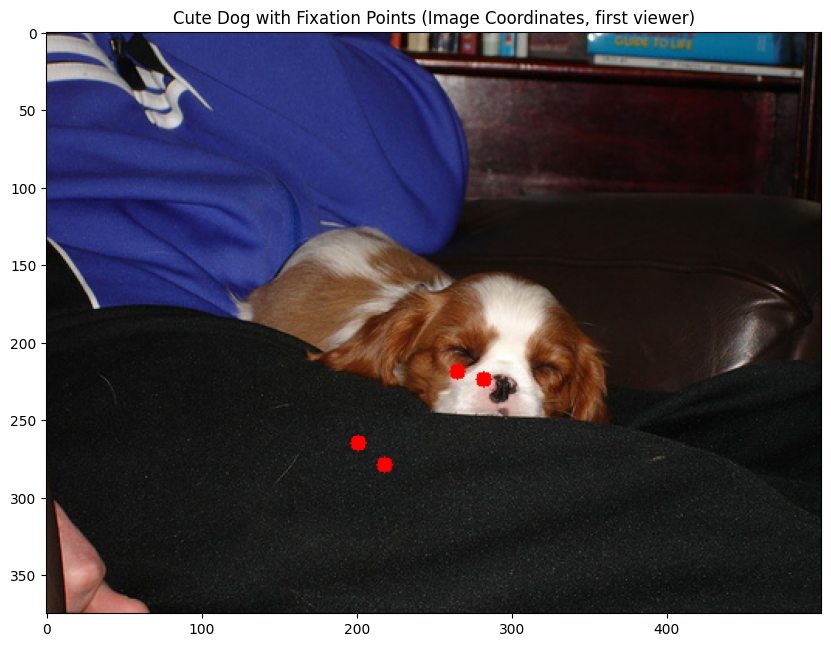

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def plot_fixations_on_image(img, fixations):
    # Create a copy of the image to draw on
    img_with_fixations = img.copy()

    # Draw fixation points on the image
    for (x, y) in fixations:
        if 0 <= x < img.shape[1] and 0 <= y < img.shape[0]:
            cv2.circle(img_with_fixations, (int(x), int(y)), 5, (255, 0, 0), -1) 

    return img_with_fixations

# Load the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot fixation points on the original image
img_with_fixations = plot_fixations_on_image(img, fixation_points)

# Display the image with fixation points
plt.figure(figsize=(10, 10))
plt.imshow(img_with_fixations)
plt.title('Cute Dog with Fixation Points (Image Coordinates, first viewer)')
plt.show()

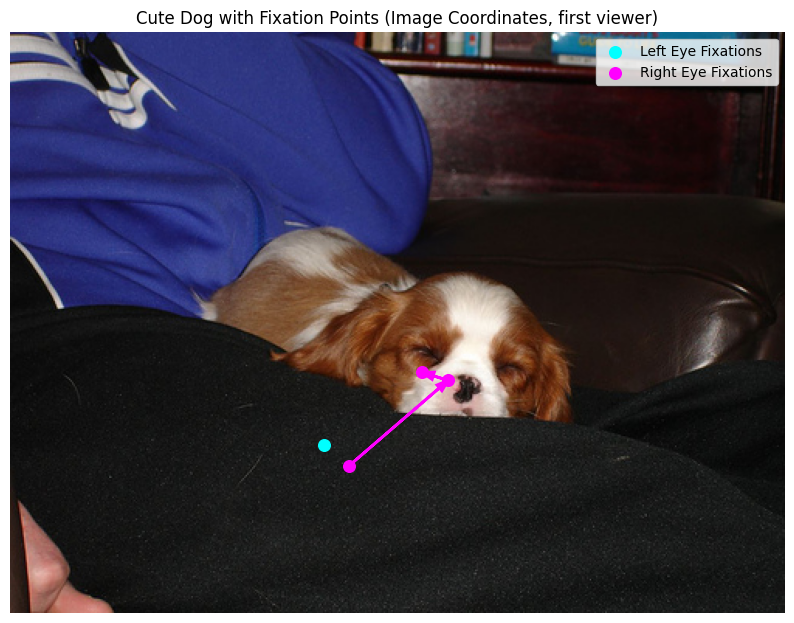

In [14]:
# For left and right eye

image_path = '/kaggle/input/images/dog_2008_001921.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the image with fixation points
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title('Cute Dog with Fixation Points (Image Coordinates, first viewer)')

# Scatter plot for left and right eye points
plt.scatter(*zip(*fix_points_left), color='cyan', label='Left Eye Fixations', s=70)  # Add left eye points
plt.scatter(*zip(*fix_points_right), color='magenta', label='Right Eye Fixations', s=70)  # Add right eye points
plt.legend()
plt.axis('off')

# Draw arrows between fixation points for left eye
for i in range(1, len(fix_points_left)):
    x_start, y_start = fix_points_left[i - 1]
    x_end, y_end = fix_points_left[i]
    plt.arrow(x_start, y_start, x_end - x_start, y_end - y_start, 
              color='cyan', shape='full', lw=2, 
              length_includes_head=True, head_width=5)

# Draw arrows between fixation points for right eye
for i in range(1, len(fix_points_right)):
    x_start, y_start = fix_points_right[i - 1]
    x_end, y_end = fix_points_right[i]
    plt.arrow(x_start, y_start, x_end - x_start, y_end - y_start, 
              color='magenta', shape='full', lw=2, 
              length_includes_head=True, head_width=5)

# Show the plot
plt.show()

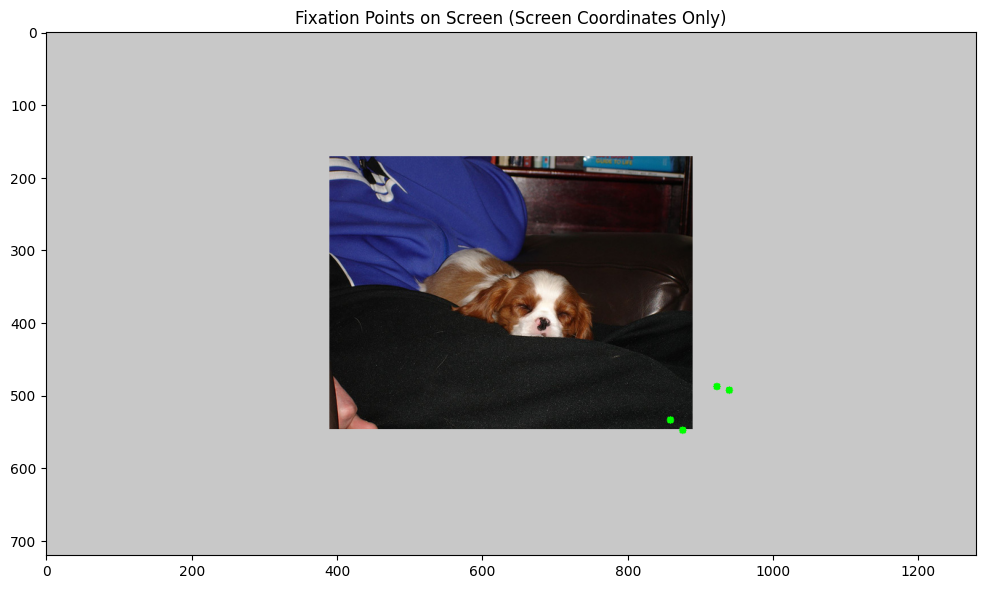

In [16]:
# plot the screen coordinates

def plot_screen_fixations_on_extended_canvas(image, fixation_points_screen, screen_size):
    # Set up a gray background canvas for the entire screen size
    canvas = np.full((screen_size[1], screen_size[0], 3), 200, dtype=np.uint8)  # Gray background

    # Calculate the placement of the image within the screen coordinates
    img_height, img_width = image.shape[:2]
    start_x = (screen_size[0] - img_width) // 2  # Adjust to center if desired
    start_y = (screen_size[1] - img_height) // 2

    # Overlay the image onto the canvas
    canvas[start_y:start_y + img_height, start_x:start_x + img_width] = image

    # Plot screen coordinate fixation points
    for (x, y) in fixation_points_screen:
        screen_x = int(x)
        screen_y = int(y)
        # Only plot points within the screen bounds
        if 0 <= screen_x < screen_size[0] and 0 <= screen_y < screen_size[1]:
            cv2.circle(canvas, (screen_x, screen_y), 5, (0, 255, 0), -1)  # Green for screen fixations

    return canvas

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Screen size (set to the dimensions of your screen for accurate plotting)
screen_size = (1280, 720)  # Example dimensions; adjust as needed

# Plot the screen fixations on the extended canvas
canvas_with_screen_fixations = plot_screen_fixations_on_extended_canvas(image, fixation_points_screen, screen_size)

# Display the result
plt.figure(figsize=(12, 8))
plt.imshow(canvas_with_screen_fixations)
plt.title('Fixation Points on Screen (Screen Coordinates Only)') # check whether this is correct, since some points are in the picture?
plt.show()

In [ ]:
# Plot the fixation points for all viewers

# Initialize lists to store fixation points for all viewers
fix_points_all_left = []
fix_points_all_right = []
fix_points_all_viewers = []

print(len(first_entry['fixations'][0])) # 5 set of fixations (5 viewers)
#print(first_entry['fixations'][0][0]) # first viewer
#print(first_entry['fixations'][0][1]) # second viewer

# Access fixation data for all viewers
for i in range(len(first_entry['fixations'][0])):
    for eye in ['fixR', 'fixL']:  # Iterate over both eyes (Right and Left)
        eye_data = first_entry['fixations'][0][i][1][eye] # screen coordinates
        pos_data = eye_data[0][0]['pos'][0]  # Get the position data (fixation points for one eye)

        # Collect fixation points while excluding NaN values
        for fix_points in pos_data:
            for fix_point in fix_points:
                x, y = fix_point[0], fix_point[1]
                if not np.isnan(x) and not np.isnan(y):  # Exclude points with NaN
                    fix_points_all_viewers.append((i+1, x, y))
                    if eye == 'fixR':
                        fix_points_all_right.append((i+1, x, y)) # store viewer, x, and y coordinates
                    elif eye == 'fixL':
                        fix_points_all_left.append((i+1, x, y))
                        
print("left", fix_points_all_left)
print("right", fix_points_all_right)

In [ ]:
# Plot left and right fix points for all viewers
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title('Cute Dog with Fixation Points (All Viewers)')

# Extract x, y coordinates for left and right eye fixation points
if fix_points_all_left:  # Check if there are any left eye points to plot
    left_x = [point[1] for point in fix_points_all_left]  # Extract x coordinates
    left_y = [point[2] for point in fix_points_all_left]  # Extract y coordinates
    plt.scatter(left_x, left_y, color='cyan', label='Left Eye Fixations', s=70)  # Add left eye points

if fix_points_all_right:  # Check if there are any right eye points to plot
    right_x = [point[1] for point in fix_points_all_right]  # Extract x coordinates
    right_y = [point[2] for point in fix_points_all_right]  # Extract y coordinates
    plt.scatter(right_x, right_y, color='magenta', label='Right Eye Fixations', s=70)  # Add right eye points

plt.legend()
plt.axis('off')

# Show the plot
plt.show()

In [ ]:
# plot all data points (not splittet into left and right) for each viewer in a different colour

# Prepare colors for each viewer
num_viewers = len(set(point[0] for point in fix_points_all_viewers))  # Unique viewer IDs
colors = ['green', 'orange', 'yellow', 'purple', 'white'] 

# Plot fixation points for all viewers
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title('Cute Dog with Fixation Points (All Viewers, Screeen Coordinates, LEFT and RIGHT)')

# Plot all fixation points color-coded by viewer
for viewer_id in range(1, num_viewers + 1):
    viewer_points = [point for point in fix_points_all_viewers if point[0] == viewer_id]
    
    if viewer_points:
        x_coords = [point[1] for point in viewer_points]
        y_coords = [point[2] for point in viewer_points]
        plt.scatter(x_coords, y_coords, color=colors[viewer_id - 1], label=f'Viewer {viewer_id}', s=70)

plt.legend()
plt.axis('off')

# Show the plot
plt.show()

### Create a Data Set for All Images and Viewers